In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

csv20 = 'data/pit2020_race.csv'
csv19 = 'data/pit2019_race.csv'

In [15]:
df20 = pd.read_csv(csv20, index_col='id')
# create new column in df
df20['2020_percent'] = df20['total'] / df20['total'].sum()
df20.head(6)


,race,emergency,transitional,unsheltered,total,2020_percent
id,,,,,,
0,White,61,19,3,83,0.309701
1,Black or African American,104,47,0,151,0.563433
2,Asian,5,0,0,5,0.018657
3,American Indian or Alaskan Native,0,0,0,0,0.000000
4,Native Hawaiian or Other Pacific Islander,0,0,0,0,0.000000
5,Multiple Races,25,4,0,29,0.108209


In [16]:
df20.describe()

,emergency,transitional,unsheltered,total,2020_percent
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,32.500000,11.666667,0.500000,44.666667,0.166667
std,42.070179,18.811344,1.224745,60.967751,0.227492
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.250000,0.000000,0.000000,1.250000,0.004664
50%,15.000000,2.000000,0.000000,17.000000,0.063433
75%,52.000000,15.250000,0.000000,69.500000,0.259328
max,104.000000,47.000000,3.000000,151.000000,0.563433


In [17]:
df19 = pd.read_csv(csv19, index_col='id')
df19['2019_percent'] = df19['total'] / df19['total'].sum()
df19.head(6)

,race,emergency,transitional,unsheltered,total,2019_percent
id,,,,,,
0,White,66,8,0,74,0.282443
1,Black or African American,94,51,0,145,0.553435
2,Asian,1,0,0,1,0.003817
3,American Indian or Alaskan Native,2,0,0,2,0.007634
4,Native Hawaiian or Other Pacific Islander,0,0,0,0,0.000000
5,Multiple Races,31,9,0,40,0.152672


In [18]:
df19.describe()

,emergency,transitional,unsheltered,total,2019_percent
count,6.000000,6.000000,6.0,6.000000,6.000000
mean,32.333333,11.333333,0.0,43.666667,0.166667
std,39.712299,19.876284,0.0,57.732717,0.220354
min,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.250000,0.000000,0.0,1.250000,0.004771
50%,16.500000,4.000000,0.0,21.000000,0.080153
75%,57.250000,8.750000,0.0,65.500000,0.250000
max,94.000000,51.000000,0.0,145.000000,0.553435


In [20]:
dfMerged = pd.merge(df19, df20, on='race')
dfMerged.head(6)

,race,emergency_x,transitional_x,unsheltered_x,total_x,2019_percent,emergency_y,transitional_y,unsheltered_y,total_y,2020_percent
0,White,66,8,0,74,0.282443,61,19,3,83,0.309701
1,Black or African American,94,51,0,145,0.553435,104,47,0,151,0.563433
2,Asian,1,0,0,1,0.003817,5,0,0,5,0.018657
3,American Indian or Alaskan Native,2,0,0,2,0.007634,0,0,0,0,0.000000
4,Native Hawaiian or Other Pacific Islander,0,0,0,0,0.000000,0,0,0,0,0.000000
5,Multiple Races,31,9,0,40,0.152672,25,4,0,29,0.108209


Text(0, 0.5, 'percent of total')

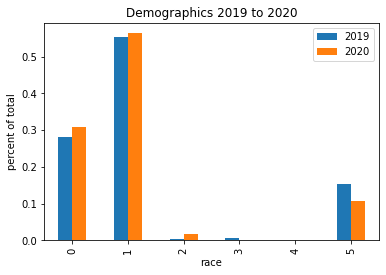

In [21]:
plotdata = pd.DataFrame({
    "2019":dfMerged.loc[:,'2019_percent'],
    "2020":dfMerged.loc[:,'2020_percent'],
# }, index = dfMerged.loc[0:5,'race']
}
)
plotdata.plot(kind="bar")
plt.title("Demographics 2019 to 2020")
plt.xlabel("race")
plt.ylabel("percent of total")

Text(0, 0.5, 'percent of total')

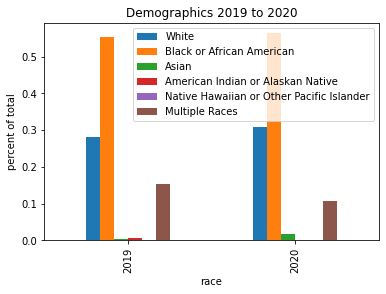

In [25]:
plotdata2 = pd.DataFrame({
    "White":[dfMerged.loc[0,'2019_percent'], dfMerged.loc[0,'2020_percent']],
    "Black or African American":[dfMerged.loc[1,'2019_percent'], dfMerged.loc[1,'2020_percent']],
    "Asian":[dfMerged.loc[2,'2019_percent'], dfMerged.loc[2,'2020_percent']],
    "American Indian or Alaskan Native":[dfMerged.loc[3,'2019_percent'], dfMerged.loc[3,'2020_percent']],
    "Native Hawaiian or Other Pacific Islander":[dfMerged.loc[4,'2019_percent'], dfMerged.loc[4,'2020_percent']],
    "Multiple Races":[dfMerged.loc[5,'2019_percent'], dfMerged.loc[5,'2020_percent']]
}, index = ['2019', '2020']
)
plotdata2.plot(kind="bar")
plt.title("Demographics 2019 to 2020")
plt.xlabel("race")
plt.ylabel("percent of total")